# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))




3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


Pierwiastki wielomianu x^2 + 3x + 2: [-2. -1.]

Współczynniki wielomianu Wilkinsona:
[-1.30767437e+12  4.33916300e+12 -6.16581761e+12  5.05699570e+12
 -2.70681335e+12  1.00967211e+12 -2.72803211e+11  5.46311296e+10
 -8.20762800e+09  9.28095740e+08 -7.85584800e+07  4.89962200e+06
 -2.18400000e+05  6.58000000e+03 -1.20000000e+02  1.00000000e+00]

Odzyskane pierwiastki:
[ 1.          2.          3.          4.          5.00000002  5.99999986
  7.00000066  7.99999792  9.00000461  9.99999278 11.000008   11.99999385
 13.00000312 13.99999906 15.00000013]


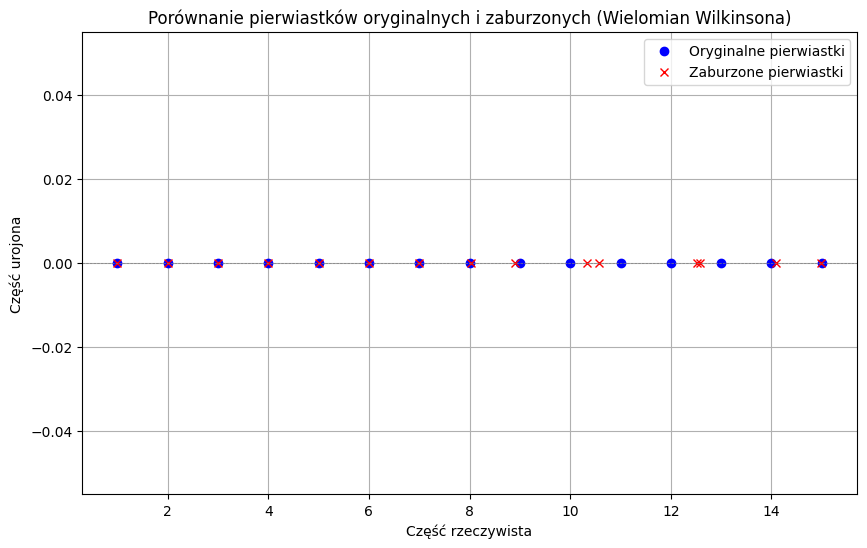

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# 1. Pierwiastki prostego wielomianu W(x) = x^2 + 3x + 2
# Odpowiadające współczynniki: 2 + 3x + x^2 → [2, 3, 1]
p_simple = Polynomial([2, 3, 1])
roots_simple = p_simple.roots()
print("Pierwiastki wielomianu x^2 + 3x + 2:", roots_simple)

# 2. Wielomian Wilkinsona: pierwiastki x = 1, 2, ..., 15
true_roots = np.arange(1, 16)
w_poly = Polynomial.fromroots(true_roots)
print("\nWspółczynniki wielomianu Wilkinsona:")
print(w_poly.coef)

# 3. Odzyskane pierwiastki z tego wielomianu
computed_roots = w_poly.roots()
print("\nOdzyskane pierwiastki:")
print(computed_roots)

# 4. Zaburzenie 13. współczynnika (indeks 12)
perturbed_coeffs = w_poly.coef.copy()
perturbed_coeffs[12] += 1e-5
w_poly_perturbed = Polynomial(perturbed_coeffs)
roots_perturbed = w_poly_perturbed.roots()

# 5. Wykres pierwiastków: oryginalnych i zaburzonych
plt.figure(figsize=(10, 6))
plt.plot(np.real(computed_roots), np.imag(computed_roots), 'bo', label='Oryginalne pierwiastki')
plt.plot(np.real(roots_perturbed), np.imag(roots_perturbed), 'rx', label='Zaburzone pierwiastki')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Porównanie pierwiastków oryginalnych i zaburzonych (Wielomian Wilkinsona)")
plt.xlabel("Część rzeczywista")
plt.ylabel("Część urojona")
plt.legend()
plt.grid(True)
plt.show()


***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Start od I1
I_forward = [1/np.e]
n_max = 20

# Iteracja w przód: I_n = 1 - n * I_{n-1}
for n in range(2, n_max + 1):
    I_prev = I_forward[-1]
    I_n = 1 - (n - 1) * I_prev
    I_forward.append(I_n)

print("Wartości I_n (kierunek: od I1 do I20):")
for i, val in enumerate(I_forward, start=1):
    print(f"I_{i} = {val:.6e}")


Wartości I_n (kierunek: od I1 do I20):
I_1 = 3.678794e-01
I_2 = 6.321206e-01
I_3 = -2.642411e-01
I_4 = 1.792723e+00
I_5 = -6.170893e+00
I_6 = 3.185447e+01
I_7 = -1.901268e+02
I_8 = 1.331888e+03
I_9 = -1.065410e+04
I_10 = 9.588791e+04
I_11 = -9.588781e+05
I_12 = 1.054766e+07
I_13 = -1.265719e+08
I_14 = 1.645435e+09
I_15 = -2.303609e+10
I_16 = 3.455413e+11
I_17 = -5.528661e+12
I_18 = 9.398724e+13
I_19 = -1.691770e+15
I_20 = 3.214364e+16


In [47]:
# Założenie: I20 = 0
I_backward = [0]  # I_20
for n in range(n_max, 1, -1):  # od 20 do 2
    I_n_minus_1 = (1 - I_backward[-1]) / n
    I_backward.append(I_n_minus_1)

# Odwrócenie listy żeby pasowały indeksy
I_backward = I_backward[::-1]

print("\nWartości I_n (kierunek: od I20 = 0 do I1):")
for i, val in enumerate(I_backward, start=1):
    print(f"I_{i} = {val:.6e}")



Wartości I_n (kierunek: od I20 = 0 do I1):
I_1 = 3.678794e-01
I_2 = 2.642411e-01
I_3 = 2.072766e-01
I_4 = 1.708934e-01
I_5 = 1.455329e-01
I_6 = 1.268024e-01
I_7 = 1.123835e-01
I_8 = 1.009320e-01
I_9 = 9.161229e-02
I_10 = 8.387707e-02
I_11 = 7.735223e-02
I_12 = 7.177325e-02
I_13 = 6.694770e-02
I_14 = 6.273216e-02
I_15 = 5.901757e-02
I_16 = 5.571895e-02
I_17 = 5.277778e-02
I_18 = 5.000000e-02
I_19 = 5.000000e-02
I_20 = 0.000000e+00


In [48]:
# Porównanie błędów
errors = [abs(a - b) for a, b in zip(I_forward, I_backward)]
for i, err in enumerate(errors, start=1):
    print(f"Błąd dla I_{i}: {err:.2e}")


Błąd dla I_1: 0.00e+00
Błąd dla I_2: 3.68e-01
Błąd dla I_3: 4.72e-01
Błąd dla I_4: 1.62e+00
Błąd dla I_5: 6.32e+00
Błąd dla I_6: 3.17e+01
Błąd dla I_7: 1.90e+02
Błąd dla I_8: 1.33e+03
Błąd dla I_9: 1.07e+04
Błąd dla I_10: 9.59e+04
Błąd dla I_11: 9.59e+05
Błąd dla I_12: 1.05e+07
Błąd dla I_13: 1.27e+08
Błąd dla I_14: 1.65e+09
Błąd dla I_15: 2.30e+10
Błąd dla I_16: 3.46e+11
Błąd dla I_17: 5.53e+12
Błąd dla I_18: 9.40e+13
Błąd dla I_19: 1.69e+15
Błąd dla I_20: 3.21e+16


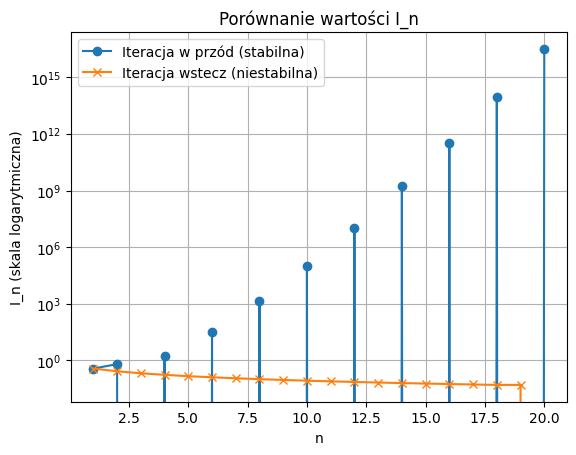

In [49]:
plt.plot(range(1, n_max + 1), I_forward, label="Iteracja w przód (stabilna)", marker='o')
plt.plot(range(1, n_max + 1), I_backward, label="Iteracja wstecz (niestabilna)", marker='x')
plt.yscale('log')
plt.title("Porównanie wartości I_n")
plt.xlabel("n")
plt.ylabel("I_n (skala logarytmiczna)")
plt.grid(True)
plt.legend()
plt.show()


# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórz wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

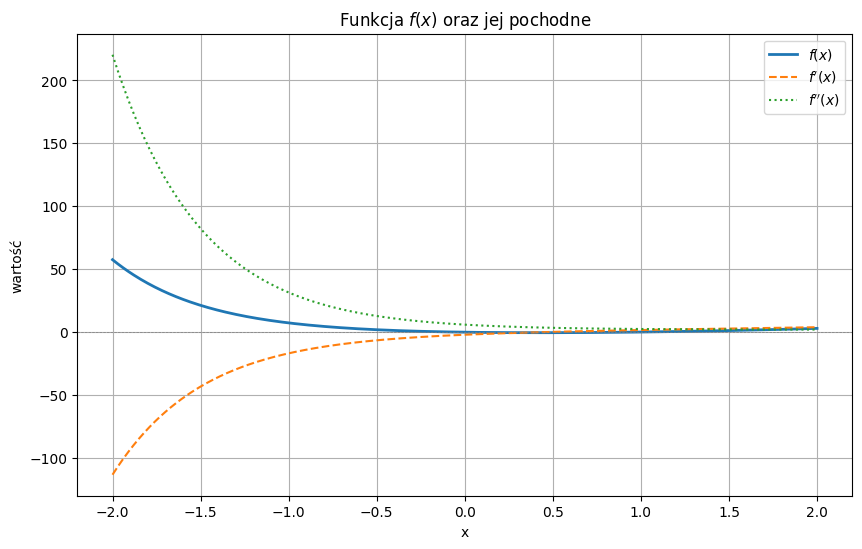

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji i pochodnych
def f(x):
    return np.exp(-2*x) + x**2 - 1

def f_prime(x):
    return -2*np.exp(-2*x) + 2*x

def f_double_prime(x):
    return 4*np.exp(-2*x) + 2

# Przedział x
x_vals = np.linspace(-2, 2, 400)

# Obliczenia
y = f(x_vals)
y_prime = f_prime(x_vals)
y_double_prime = f_double_prime(x_vals)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y, label='$f(x)$', linewidth=2)
plt.plot(x_vals, y_prime, label="$f'(x)$", linestyle='--')
plt.plot(x_vals, y_double_prime, label="$f''(x)$", linestyle=':')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.title("Funkcja $f(x)$ oraz jej pochodne")
plt.xlabel("x")
plt.ylabel("wartość")
plt.legend()
plt.show()


***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [51]:
def bisection(f, a, b, tol=1e-8, max_iter=100):
    fa, fb = f(a), f(b)
    if fa == 0:
        return a, 0
    if fb == 0:
        return b, 0
    if fa * fb > 0:
        raise ValueError("Funkcja musi mieć różne znaki na końcach przedziału [a, b]")

    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c, i + 1
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return c, max_iter


In [52]:
def newton(f, df, x0, tol=1e-8, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Pochodna wynosi 0 – metoda Newtona nie może kontynuować")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol or abs(f(x_new)) < tol:
            return x_new, i + 1
        x = x_new
    return x, max_iter


In [53]:
def secant(f, x0, x1, tol=1e-8, max_iter=100):
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            raise ZeroDivisionError("Dzielenie przez zero w metodzie siecznych")
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol or abs(f(x2)) < tol:
            return x2, i + 1
        x0, x1 = x1, x2
    return x2, max_iter


In [ ]:
# Funkcja
def f(x):
    return np.exp(-2*x) + x**2 - 1

def df(x):
    return -2*np.exp(-2*x) + 2*x

# Szacujemy miejsce zerowe w pobliżu x=0.7

root_bisection, it_b = bisection(f, 0, 1)
root_newton, it_n = newton(f, df, 0.5)
root_secant, it_s = secant(f, 0, 1)

print(f"Bisekcja: x = {root_bisection:.6f}, iteracje = {it_b}")
print(f"Newton:   x = {root_newton:.6f}, iteracje = {it_n}")
print(f"Sieczne:  x = {root_secant:.6f}, iteracje = {it_s}")


Bisekcja: x = 0.000000, iteracje = 0
Newton:   x = 0.916563, iteracje = 6
Sieczne:  x = 0.000000, iteracje = 1


***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [ ]:
import numpy as np

# Funkcja i pochodna
def f(x):
    return np.exp(-2*x) + x**2 - 1

def df(x):
    return -2*np.exp(-2*x) + 2*x

# Algorytmy
# ... bisection(f, a, b, tol, max_iter)
# ... newton(f, df, x0, tol, max_iter)
# ... secant(f, x0, x1, tol, max_iter)

# Parametry
tol = 1e-6
max_iter = 100

# Dwa miejsca zerowe:
# - Pierwsze w okolicach x ≈ -1
# - Drugie w okolicach x ≈ 0.7

# === PIERWIASTEK UJEMNY ===
bisection_neg = bisection(f, -1.5, 0, tol, max_iter)
newton_neg = newton(f, df, -1.0, tol, max_iter)
secant_neg = secant(f, -1.5, 0, tol, max_iter)

# === PIERWIASTEK DODATNI ===
bisection_pos = bisection(f, 0.5, 1.5, tol, max_iter)
newton_pos = newton(f, df, 0.7, tol, max_iter)
secant_pos = secant(f, 0.5, 1.5, tol, max_iter)

# === WYNIKI ===
print("\n--- PIERWIASTEK UJEMNY ---")
print(f"Bisekcja:       x = {bisection_neg[0]:.6f}, iteracje = {bisection_neg[1]}")
print(f"Newton:         x = {newton_neg[0]:.6f}, iteracje = {newton_neg[1]}")
print(f"Sieczne:        x = {secant_neg[0]:.6f}, iteracje = {secant_neg[1]}")

print("\n--- PIERWIASTEK DODATNI ---")
print(f"Bisekcja:       x = {bisection_pos[0]:.6f}, iteracje = {bisection_pos[1]}")
print(f"Newton:         x = {newton_pos[0]:.6f}, iteracje = {newton_pos[1]}")
print(f"Sieczne:        x = {secant_pos[0]:.6f}, iteracje = {secant_pos[1]}")



--- PIERWIASTEK UJEMNY ---
Bisekcja:       x = 0.000000, iteracje = 0
Newton:         x = -0.000000, iteracje = 6
Sieczne:        x = 0.000000, iteracje = 1

--- PIERWIASTEK DODATNI ---
Bisekcja:       x = 0.916563, iteracje = 19
Newton:         x = 0.916563, iteracje = 4
Sieczne:        x = 0.916563, iteracje = 6


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

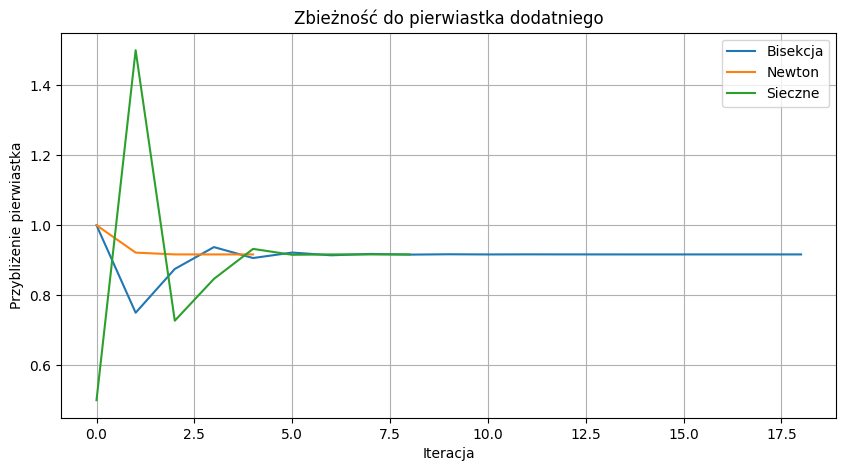

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja f(x)
def f(x):
    return np.exp(-2*x) + x**2 - 1

# Pochodna funkcji f(x)
def df(x):
    return -2*np.exp(-2*x) + 2*x

# Funkcja Newtona z zapisem przybliżeń
def newton_trace(f, df, x0, tol=1e-6, max_iter=100):
    x_vals = [x0]
    for i in range(max_iter):
        fx = f(x_vals[-1])
        dfx = df(x_vals[-1])
        if dfx == 0:
            break
        x_new = x_vals[-1] - fx / dfx
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:
            break
    return x_vals

# Funkcja Bisekcji z zapisem przybliżeń
def bisection_trace(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError(f"Funkcja musi mieć różne znaki na końcach przedziału: f({a}) = {f(a)}, f({b}) = {f(b)}")
    x_vals = []
    for i in range(max_iter):
        c = (a + b) / 2
        x_vals.append(c)
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return x_vals

# Funkcja Siecznych z zapisem przybliżeń
def secant_trace(f, x0, x1, tol=1e-6, max_iter=100):
    x_vals = [x0, x1]
    for i in range(2, max_iter):
        f0, f1 = f(x_vals[-2]), f(x_vals[-1])
        if f1 - f0 == 0:
            break
        x2 = x_vals[-1] - f1 * (x_vals[-1] - x_vals[-2]) / (f1 - f0)
        x_vals.append(x2)
        if abs(x2 - x_vals[-2]) < tol:
            break
    return x_vals

# Obliczenia dla różnych pierwiastków
x_newton_pos = newton_trace(f, df, 1.0)
x_bisection_pos = bisection_trace(f, 0.5, 1.5)
x_secant_pos = secant_trace(f, 0.5, 1.5)

# Wykres dla pierwiastka dodatniego
plt.figure(figsize=(10, 5))
plt.plot(range(len(x_bisection_pos)), x_bisection_pos, label="Bisekcja")
plt.plot(range(len(x_newton_pos)), x_newton_pos, label="Newton")
plt.plot(range(len(x_secant_pos)), x_secant_pos, label="Sieczne")

plt.title("Zbieżność do pierwiastka dodatniego")
plt.xlabel("Iteracja")
plt.ylabel("Przybliżenie pierwiastka")
plt.legend()
plt.grid()
plt.show()
